In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('/kaggle/input/traffic-accident-trends/traffic_accident_trends_dataset.csv')
print(data.head())

     ID Category        Date  Number of Accidents  Accident Severity Index  \
0  ID_1   Type D  2018-01-01                   73                    76.37   
1  ID_2   Type D  2018-01-02                  423                    22.94   
2  ID_3   Type B  2018-01-03                  706                    35.56   
3  ID_4   Type A  2018-01-04                  592                   308.99   
4  ID_5   Type C  2018-01-05                  160                   135.74   

      Label  
0   Neutral  
1  Positive  
2  Negative  
3  Positive  
4   Neutral  


In [24]:
#---Basic info---
print(data.info())

#---Check for missing value---
print(data.isnull().sum())

#---Sammary Statistics---
print("Unique Categories:", data['Category'].unique)
print("Unique Labels:",data['Label'].unique)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1000 non-null   object 
 1   Category                 1000 non-null   object 
 2   Date                     1000 non-null   object 
 3   Number of Accidents      1000 non-null   int64  
 4   Accident Severity Index  1000 non-null   float64
 5   Label                    1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB
None
ID                         0
Category                   0
Date                       0
Number of Accidents        0
Accident Severity Index    0
Label                      0
dtype: int64
Unique Categories: <bound method Series.unique of 0      Type D
1      Type D
2      Type B
3      Type A
4      Type C
        ...  
995    Type C
996    Type B
997    Type A
998    Type C
999    Type D
Name

In [26]:
#---avg---
print("Unique Mein",data['Number of Accidents'])

Unique Mein 0       73
1      423
2      706
3      592
4      160
      ... 
995    351
996    682
997    960
998    906
999    913
Name: Number of Accidents, Length: 1000, dtype: int64


In [28]:
#---Drop rows with missing valuer---
data = data.dropna()

#---Convert Data coloum to datetime formet---
data["Data"] = pd.to_datetime(data['Date'])

#---Check for duplicate rows---
data = data.drop_duplicates()

#---Validate data types---
print(data.dtypes)

ID                                 object
Category                           object
Date                               object
Number of Accidents                 int64
Accident Severity Index           float64
Label                              object
Data                       datetime64[ns]
dtype: object


In [29]:
#Total Accidents by Catagory
total_Accidents = data.groupby('Category')['Number of Accidents'].sum()
print(total_Accidents)

## Average Stay Duraction by Catagory
#Average_stay_duration = data.groupby('Catagory')['Avarage']
#print(avarage_stay_duration)

##Monthly Accidents Trends 
#data['Month'] = data['Date'].dt.month
#Monthly_trends = date.groupby('Month')['Number of Accidents']
#PRINT()

Category
Type A    121516
Type B    125016
Type C    129981
Type D    128102
Name: Number of Accidents, dtype: int64


In [31]:
#Total Accidents by Catagory
total_Accidents = data.groupby('Category')['Number of Accidents'].mean()
print(total_Accidents)

Number_of_Accidents_lable=data.groupby('Label')['Number of Accidents'].mean()
print(Number_of_Accidents_lable)

#Average stay Duration by cetegory 
#average_stay_duration= date.groupby('Category')['avg Stay Duration(days)'].mean()
#print(average_stay_duration)

Category
Type A    470.992248
Type B    520.900000
Type C    509.729412
Type D    518.631579
Name: Number of Accidents, dtype: float64
Label
Negative    507.241722
Neutral     499.513595
Positive    507.054496
Name: Number of Accidents, dtype: float64


In [35]:
data['Date'] = pd.to_datetime(data['Date'])

In [36]:
#Monthly student performaens
data['Month']= data['Date'].dt.month
monthly_Number_of_Accidents= data.groupby('Month')['Number of Accidents'].mean()
print(monthly_Number_of_Accidents)


Month
1     511.645161
2     468.917647
3     503.440860
4     471.400000
5     565.913978
6     487.422222
7     531.408602
8     517.075269
9     500.988372
10    522.693548
11    469.816667
12    487.741935
Name: Number of Accidents, dtype: float64


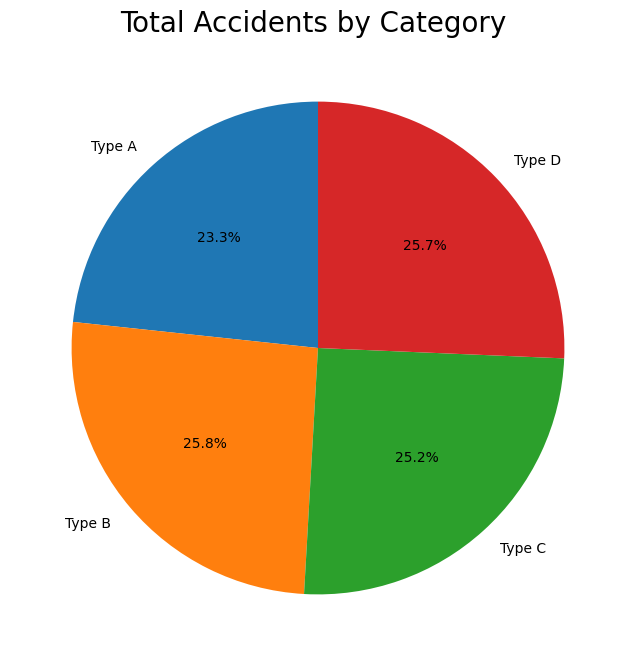

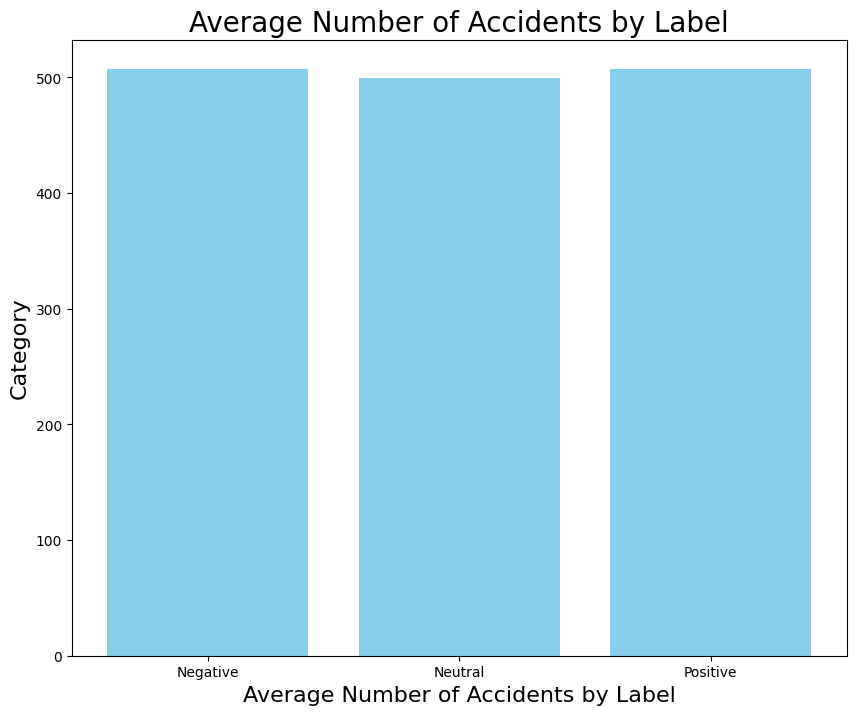

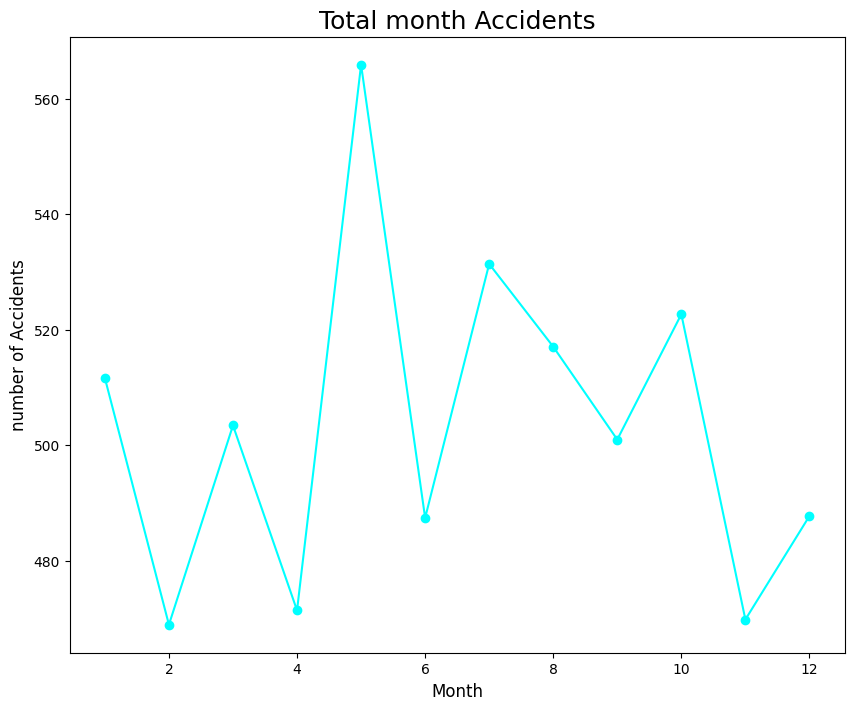

In [39]:
#Visualization
plt.figure(figsize=(10,8))
plt.pie(total_Accidents.values, labels=total_Accidents.index, autopct= '%1.1f%%', startangle = 90)
plt.title('Total Accidents by Category ', fontsize= 20)
plt.show()

## Barchat
plt.figure(figsize=(10,8))
plt.bar(Number_of_Accidents_lable.index, Number_of_Accidents_lable.values, color= 'SkyBlue')
plt.title("Average Number of Accidents by Label", fontsize=20 )
plt.xlabel("Average Number of Accidents by Label", fontsize=16)
plt.ylabel("Category", fontsize=16)
plt.show()

## plot chat
plt.figure(figsize=(10, 8))
plt.plot(monthly_Number_of_Accidents.index, monthly_Number_of_Accidents.values, marker='o', color='Aqua')
plt.title("Total month Accidents", fontsize=18)
plt.xlabel("Month", fontsize=12)
plt.ylabel("number of Accidents", fontsize=12)
plt.show()